In [1]:
import pandas as pd
import numpy as np
import re
from datetime import date, timedelta

### Données hospitalières

In [2]:
df = pd.read_csv('../data/raw/donnees-hospitalieres-covid19-raw.csv', sep=';')

In [3]:
df.head(30) # Show first 30

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6
5,02,2,2020-03-18,22,6,7,5
6,03,0,2020-03-18,4,0,1,0
7,03,1,2020-03-18,1,0,0,0
8,03,2,2020-03-18,3,0,1,0
9,04,0,2020-03-18,3,1,2,0


In [4]:
df.describe()

,sexe,hosp,rea,rad,dc
count,70905.000000,70905.000000,70905.000000,70905.000000,70905.000000
mean,1.000000,85.355772,12.538340,473.702926,116.453974
std,0.816502,186.152150,35.159544,803.508130,206.485984
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,69.000000,14.000000
50%,1.000000,24.000000,2.000000,180.000000,41.000000
75%,2.000000,77.000000,10.000000,479.000000,110.000000
max,2.000000,3281.000000,855.000000,8739.000000,2172.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70905 entries, 0 to 70904
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dep     70902 non-null  object
 1   sexe    70905 non-null  int64 
 2   jour    70905 non-null  object
 3   hosp    70905 non-null  int64 
 4   rea     70905 non-null  int64 
 5   rad     70905 non-null  int64 
 6   dc      70905 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 3.8+ MB


In [6]:
# edit the following days : 2020-06-27, 2020-06-28, 2020-06-29
df['jour'] = df['jour'].replace('27/06/2020', '2020-06-27')
df['jour'] = df['jour'].replace('28/06/2020', '2020-06-28')
df['jour'] = df['jour'].replace('29/06/2020', '2020-06-29')

In [7]:
# create a filter for all genders
all_gender_filter = df['sexe'] == 0

In [8]:
date_pattern = re.compile("[0-9]{4}-[0-9]{2}-[0-9]{2}")
pattern_matcher_filter = df['jour'].str.match(pat = date_pattern)

In [9]:
# create a filter for yesterday's cases
yesterday = date.today() - timedelta(days = 1)
yesterday_filter = df['jour'] == yesterday.strftime('%Y-%m-%d')
yesterday_df = df.where(yesterday_filter & all_gender_filter & pattern_matcher_filter)

In [10]:
yesterday_df = yesterday_df.dropna() #remove NaN rows

In [11]:
yesterday_df.describe()

,sexe,hosp,rea,rad,dc
count,101.0,101.000000,101.000000,101.000000,101.000000
mean,0.0,286.683168,42.782178,1250.475248,270.613861
std,0.0,334.799012,56.790599,1697.725906,372.691292
min,0.0,14.000000,0.000000,69.000000,9.000000
25%,0.0,80.000000,10.000000,262.000000,59.000000
50%,0.0,164.000000,21.000000,598.000000,131.000000
75%,0.0,358.000000,54.000000,1483.000000,288.000000
max,0.0,1723.000000,275.000000,8739.000000,2172.000000


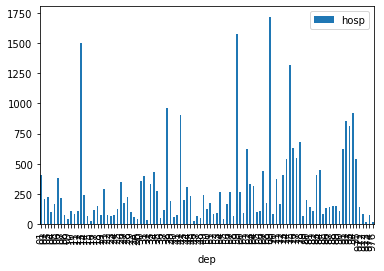

In [12]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'hosp')

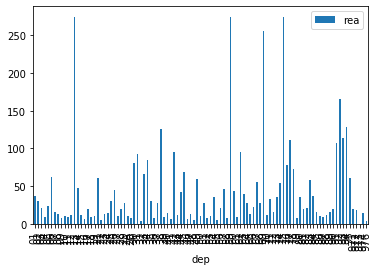

In [13]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'rea')

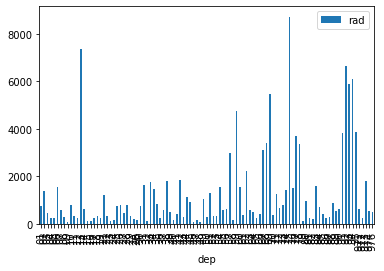

In [14]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'rad')

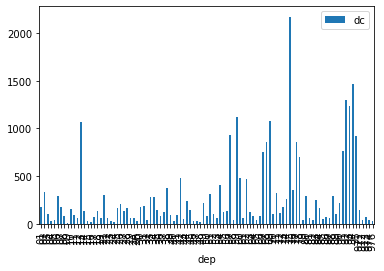

In [15]:
yesterday_df.plot(kind = 'bar', x = 'dep', y = 'dc')

In [16]:
last_month = date.today() - timedelta(days = 30)
last_month_filter = df['jour'] >= last_month.strftime('%Y-%m-%d')
last_month_df = df.where(last_month_filter & all_gender_filter & pattern_matcher_filter).dropna()
last_month_df = last_month_df.groupby(['jour'])
last_month_df.head()
last_month_df.sum()['hosp']

jour
2020-10-08     7603.0
2020-10-09     7843.0
2020-10-10     7976.0
2020-10-11     8231.0
2020-10-12     8671.0
2020-10-13     8928.0
2020-10-14     9173.0
2020-10-15     9584.0
2020-10-16    10021.0
2020-10-17    10399.0
2020-10-18    10897.0
2020-10-19    11640.0
2020-10-20    12435.0
2020-10-21    13162.0
2020-10-22    14009.0
2020-10-23    14985.0
2020-10-24    15637.0
2020-10-25    16454.0
2020-10-26    17761.0
2020-10-27    18955.0
2020-10-28    20184.0
2020-10-29    21160.0
2020-10-30    22153.0
2020-10-31    23013.0
2020-11-01    24008.0
2020-11-02    25120.0
2020-11-03    26242.0
2020-11-04    27511.0
2020-11-05    28403.0
2020-11-06    28955.0
Name: hosp, dtype: float64

In [17]:
week_title = 'Tendance du ' + last_month.strftime('%d/%m/%Y') + ' au ' + yesterday.strftime('%d/%m/%Y')

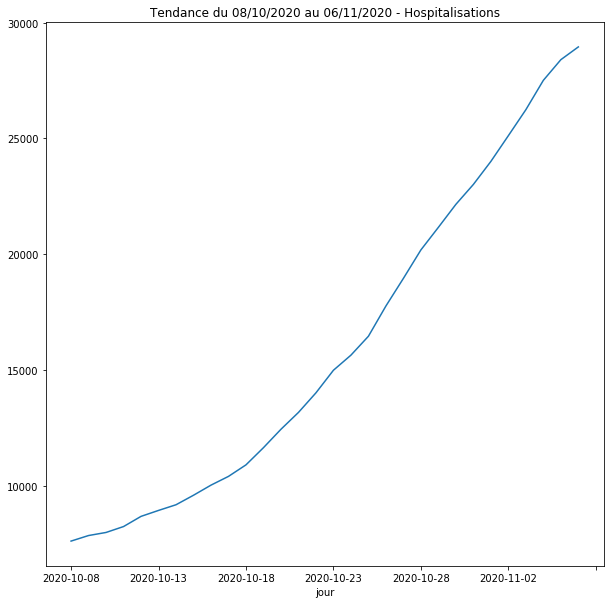

In [18]:
last_month_df.sum()['hosp'].plot(title = week_title + ' - Hospitalisations', figsize= (10,10))

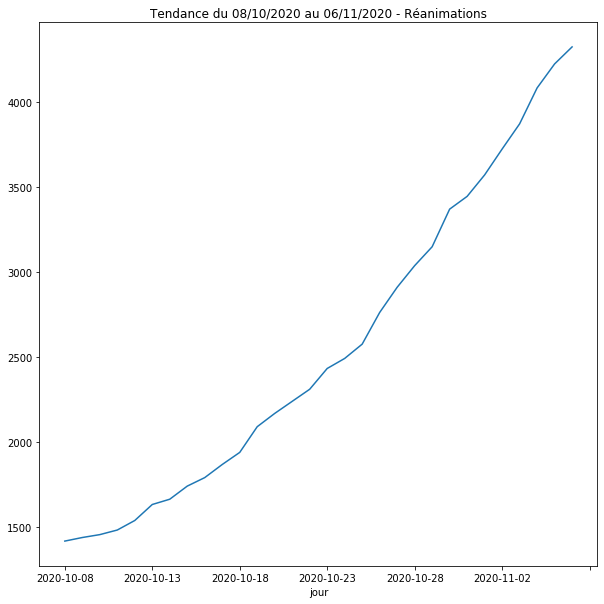

In [19]:
last_month_df.sum()['rea'].plot(title = week_title + ' - Réanimations', figsize= (10,10))

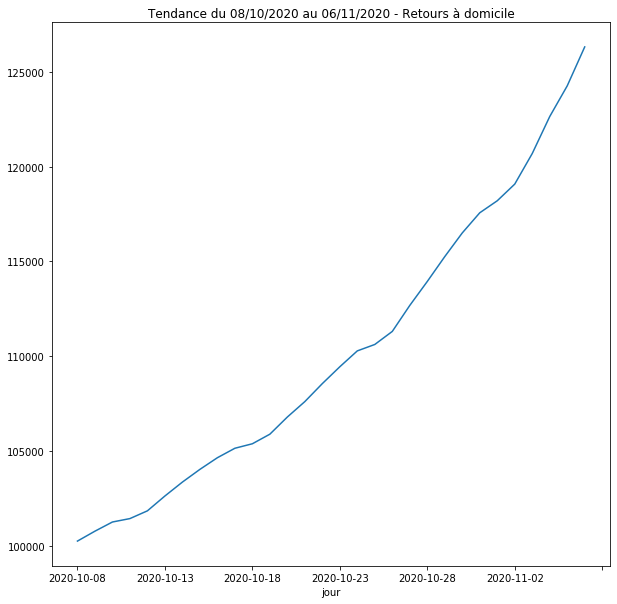

In [20]:
last_month_df.sum()['rad'].plot(title = week_title + ' - Retours à domicile', figsize= (10,10))

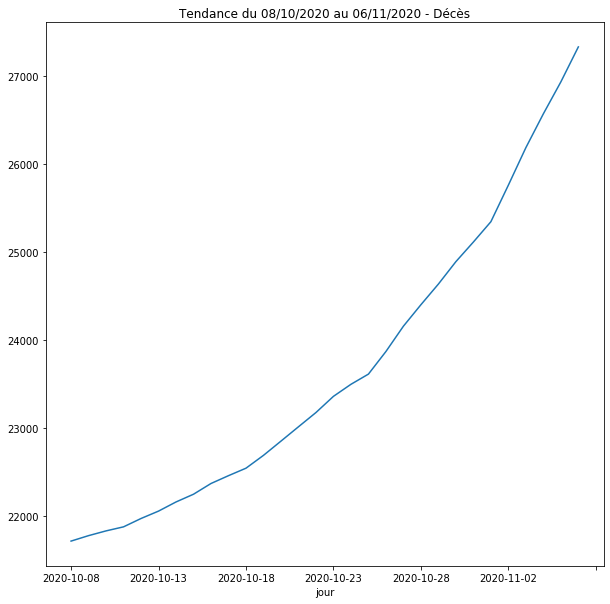

In [21]:
last_month_df.sum()['dc'].plot(title = week_title + ' - Décès', figsize= (10,10))

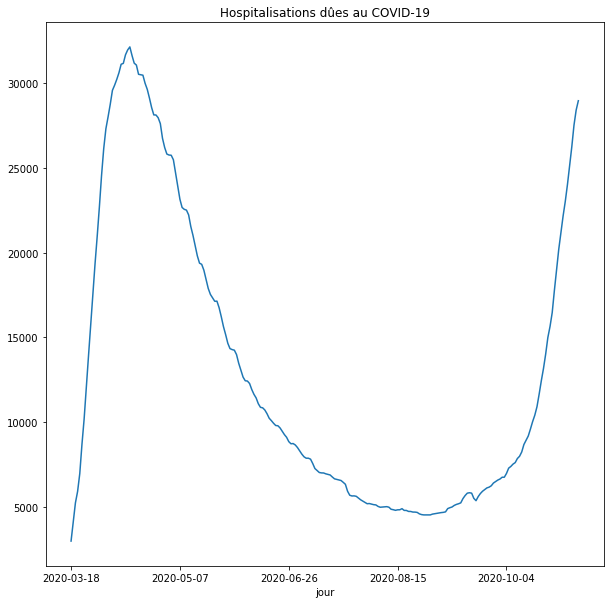

In [26]:
test = df.where(all_gender_filter).groupby('jour').sum()['hosp'].plot(title = 'Hospitalisations dues au COVID-19', figsize = (10, 10))

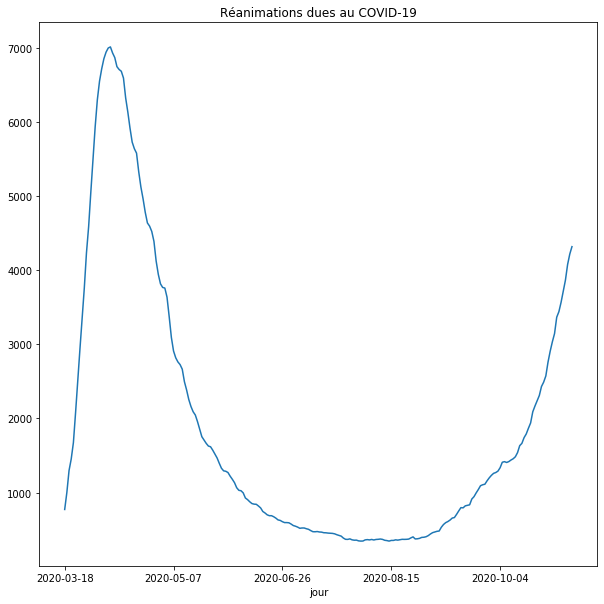

In [27]:
df.where(all_gender_filter).groupby('jour').sum()['rea'].plot(title = 'Réanimations dues au COVID-19', figsize = (10, 10))

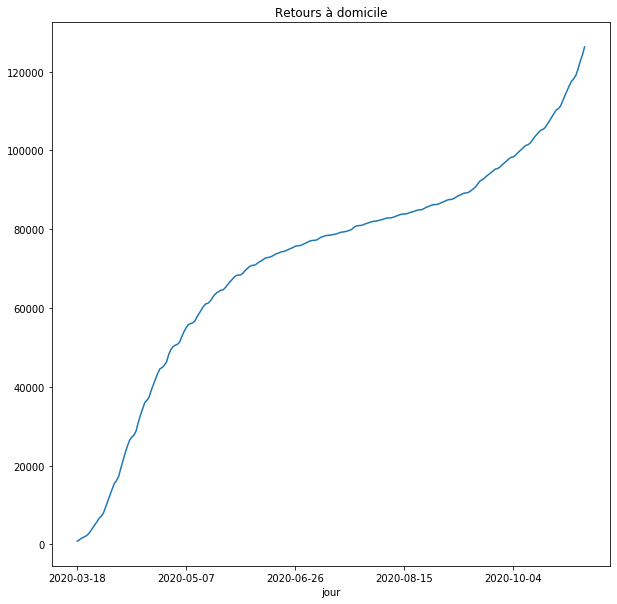

In [28]:
df.where(all_gender_filter).groupby('jour').sum()['rad'].plot(title = 'Retours à domicile', figsize = (10, 10))

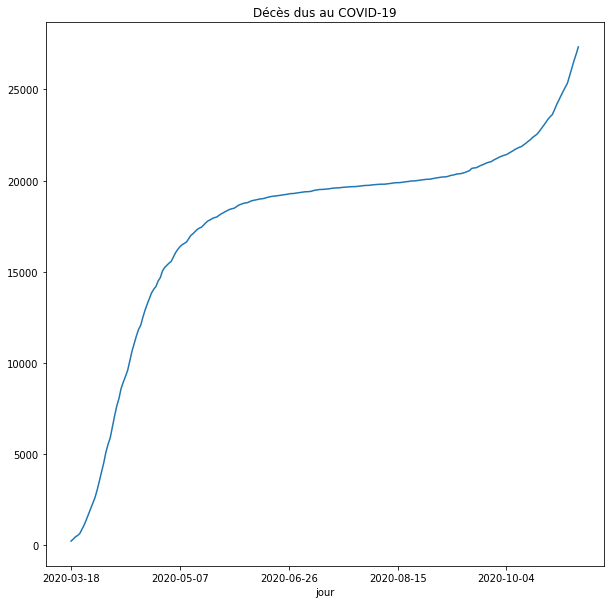

In [30]:
df.where(all_gender_filter).groupby('jour').sum()['dc'].plot(title = 'Décès dus au COVID-19', figsize = (10, 10))

### Classe, âge

In [54]:
classe_age_df = pd.read_csv('../data/raw/donnees-hospitalieres-classe-age-covid19-raw.csv', sep=';')

In [73]:
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(0, 'inconnu')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(9, '0 - 9')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(19, '10 - 19')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(29, '20 - 29')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(39, '30 - 39')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(49, '40 - 49')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(59, '50 - 59')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(69, '60 - 69')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(79, '70 - 79')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(89, '80 - 89')
classe_age_df['cl_age90'] = classe_age_df['cl_age90'].replace(90, '90 et + ')

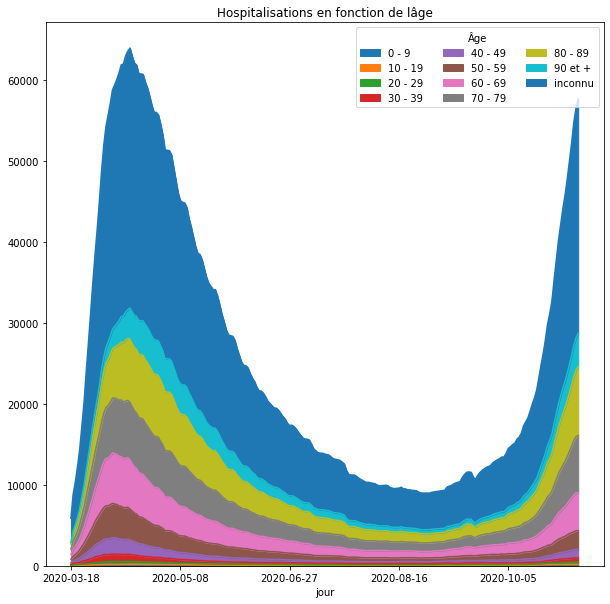

In [74]:
classe_age_df.groupby(['jour', 'cl_age90']).sum()['hosp'].unstack(-1).plot(kind = 'area', title='Hospitalisations en fonction de l''âge', figsize = (10, 10)).legend(loc='upper right', title = 'Âge', ncol=3)

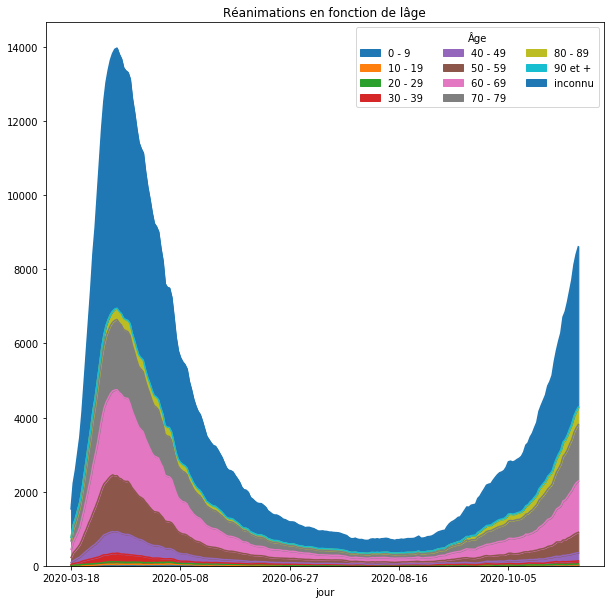

In [75]:
classe_age_df.groupby(['jour', 'cl_age90']).sum()['rea'].unstack(-1).plot(kind = 'area', title='Réanimations en fonction de l''âge', figsize = (10, 10)).legend(loc='upper right', title = 'Âge', ncol=3)

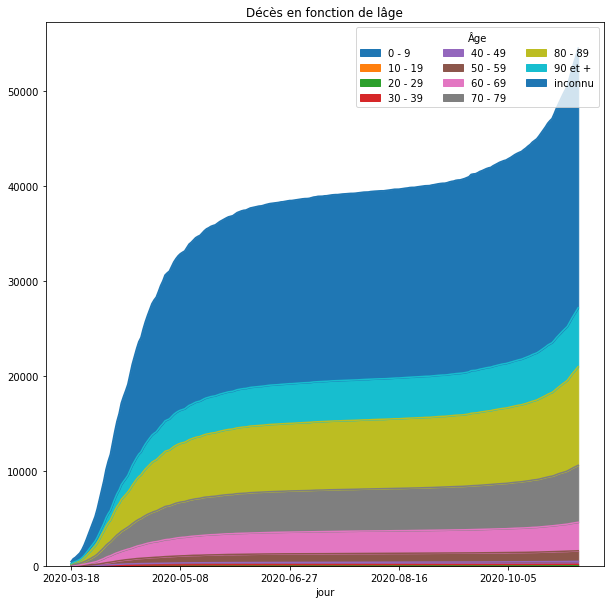

In [76]:
classe_age_df.groupby(['jour', 'cl_age90']).sum()['dc'].unstack(-1).plot(kind = 'area', title='Décès en fonction de l''âge', figsize = (10, 10)).legend(loc='upper right', title = 'Âge', ncol=3)

#### Sans les inconnus

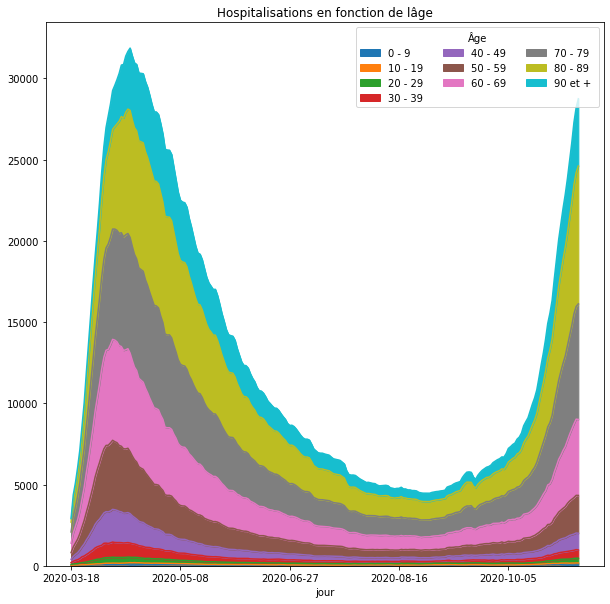

In [77]:
classe_age_df.where(classe_age_df['cl_age90'] != 'inconnu').groupby(['jour', 'cl_age90']).sum()['hosp'].unstack(-1).plot(kind = 'area', title='Hospitalisations en fonction de l''âge', figsize = (10, 10)).legend(loc='upper right', title = 'Âge', ncol=3)

### Nouveaux covids

In [59]:
nouveau_df = pd.read_csv('../data/raw/donnees-hospitalieres-nouveaux-covid19-raw.csv', sep=';')

In [ ]:
nouveau_df.groupby(['jour']).sum()['hosp'].unstack(-1).plot(kind = 'area', figsize = (10, 10))